# Task 1: Acquire, Preprocess, and Analyze the Data


## DataSet Analysis - White Wine Quality DataSet

Link:https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Note: Only the white wine dataset will be used. The dataset includes 12 features with the values being a ranking from 1-10. In order to keep the classification binary, I will set qualities equal to or greater than 6 as good wine (value of 1) and any other quality value as bad wine (value of 0)


In [35]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [36]:
# Load the Red Wines dataset
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
data = pd.read_csv(URL, sep =';')

data.dropna(how = 'any')

# Change Quality Values to 1 (good wine) or 0 (bad wine)
data["quality"] = 1*(data["quality"]>5)

print(data["quality"])
data.head(5)

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      0
11      0
12      0
13      1
14      0
15      1
16      1
17      1
18      1
19      0
20      1
21      1
22      1
23      0
24      1
25      1
26      1
27      1
28      1
29      1
       ..
4868    1
4869    1
4870    1
4871    1
4872    0
4873    1
4874    1
4875    1
4876    1
4877    0
4878    0
4879    1
4880    1
4881    1
4882    0
4883    1
4884    0
4885    1
4886    1
4887    1
4888    0
4889    1
4890    1
4891    1
4892    0
4893    1
4894    0
4895    1
4896    1
4897    1
Name: quality, Length: 4898, dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [37]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.665169
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


In [38]:
# Split Data between Training and Test Data (80/20 split)
# Needs to be randomly split

#Create Copy of Data Set and Then create training set and test set
data_copy = data.copy()
train_set = data_copy.sample(frac=0.80, random_state=0)
test_set = data_copy.drop(train_set.index)
          
x_train = np.array(train_set.iloc[:, :-1], dtype = float)
y_train = np.array(train_set["quality"], dtype = int)
          
x_test = np.array(test_set.iloc[:, :-1], dtype = float)
y_test = np.array(test_set["quality"], dtype = int)


print("x_train size: ", x_train.shape)
print("y_train size: ", y_train.shape)
print("x_test size: ", x_test.shape)
print("y_test size: ", y_test.shape)

x_train size:  (3918, 11)
y_train size:  (3918,)
x_test size:  (980, 11)
y_test size:  (980,)


In [39]:
#Normalize the Data

x_test_mean = np.mean(x_test, axis = 0)
x_test_std = np.std(x_test, axis = 0)

#np.seterr(divide='ignore', invalid='ignore')
x_test = (x_test - x_test_mean)/x_test_std


x_train_mean = np.mean(x_train, axis = 0)
#print(x_train_mean)
x_train_std = np.std(x_train, axis = 0)
#print(x_train_std)

#np.seterr(divide='ignore', invalid='ignore')
x_train = (x_train - x_train_mean)/x_train_std
#print(x_train[:10,:])

print("x_train size: ", x_train.shape)
print("x_test size: ", x_test.shape)

x_train size:  (3918, 11)
x_test size:  (980, 11)


## Task 2 - Implement the Model

### Logistic Regression

In [40]:
class LogisticRegression:

    def __init__(self, intercept = True): 
        #self.num_steps = num_steps
        #self.leaning_rate = learning_rate
        #self.error_rate = error_rate
        self.intercept = intercept

    
    def add_intercept(self, X):
        intercept = np.ones((X.shape[0],1))
        return np.concatenate((intercept,X), axis = 1)
    
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))
                  
                  
    def cost_function(self, X, y, w): #Cross Entropy Loss Function
        N,D = X.shape
        z = np.dot(X, w)
        
        J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))
        grad = np.dot(X.T,(self.sigmoid(z) - y)) / N
        
        return grad, J
    
                  
    def gradient_descent(self, X, y, num_steps, learning_rate, min_error):
        # Min error is just the early termination requirement (Set up as Small change is objective right now)
        N,D = X.shape
        w = np.zeros(D)
        grad, J_previous = self.cost_function(X, y, w)
        
        for i in range(num_steps):
                grad, J = self.cost_function(X, y, w)
                w = w - (learning_rate * grad)
                
                if np.linalg.norm(grad) < min_error:
                #if np.abs(J - J_previous) < min_error: # Need to determine the best way to determine the early stopping point
                    break
                else:
                    J_previous = J
                  
        print("Number of Iterations = " + str(i))
        print("Minimum Cost (J) = " + str(J))          
        return w, J

    
    def fit(self, X, y, num_steps, learning_rate, min_error): #Logistic regression and Gradient Descent (Input is X and y, outputs weights of model)
        if self.intercept == True:
            X = self.add_intercept(X)
            
        
        #Gradient function
        w, J = self.gradient_descent(X, y, num_steps, learning_rate, min_error)
        
        print("Weights of Model: ", w)
        return w
    
    def predict(self, X, w): #Ouput is the predicted values for y
        if self.intercept == True:
            X = self.add_intercept(X)
        
        y_pred = self.sigmoid(np.dot(X, w))
        y_pred = y_pred.round() #Rounds the value to 1 or 0
        
        #print("y_pred Shape")
        #print(y_pred.shape)
        return y_pred
    
    def evaluate_acc(self, y, y_pred):
        #Accuracy = (TP + TN)/ P + N
        #Error Rate = (FP + FN)/P + N
        #Precision = TP/RP
        #Recall = TP/P
        
        A = (np.mean(y_pred == y))*100
        #print(A)
        
        #Alternatively
        TP, TN, FN, FP = 0,0,0,0
        for i in range(len(y_pred)):
            if (y[i] == y_pred[i]) & (y_pred[i] == 1):
                TP = TP + 1
            if (y[i] != y_pred[i]) & (y_pred[i] == 1):
                FP = FP + 1
            if (y[i] == y_pred[i]) & (y_pred[i] == 0):
                TN = TN + 1
            if (y[i] != y_pred[i]) & (y_pred[i] == 0):
                FN = FN + 1
            
        N = TN + FP
        RP = TP + FP
        RN = TN + FN
        P = TP + FN
        
        accuracy = ((TP + TN) / (P + N))*100
        errorRate = ((FP + FN) / (P + N))*100
        precision = (TP / (RP))*100
        recall = (TP / (P))*100

        print("Accuracy: ", accuracy, "%")
        print("Error Rate: ", errorRate, "%")
        print("Precision: ", precision, "%")
        print("Recall: ", recall, "% \n")
        
        return A  

    

### Naive Bayes

In [41]:
class NaiveBayes:
    
    def __init__(self):
        pass

    def fit(self, X, y):
        #X here is an array where the rows are the samples and the columns are the features
        n_instances, n_features = X.shape
        
        #We find the number of classes
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # We compute the  mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype= float)
        self._var = np.zeros((n_classes, n_features), dtype= float)
        
        # For each class we want one prior
        self._priors =  np.zeros(n_classes, dtype = float)

        for c in self._classes:
            #we select the samples that have the class c as an ouput and calculate mean and variance
            X_class = X[y == c]
            self._mean[c,:] = np.mean(X_class, axis=0)
            self._var[c,:] = np.var(X_class, axis=0)
            # we compute the frequency of the class
            # X_class.shape[0] returns the number of samples with Xc as a sample for the class c
            self._priors[c] = X_class.shape[0] / float(n_instances)

    def predict(self, X):
        ypred = [self._predict(x) for x in X]
        #print(ypred)
        return ypred

    def _predict(self, x):
        posteriors = []

        # compute the posterior probability for each class
        #we go through each class
        for c in self._classes:
            prior = np.log(self._priors[c])
            class_likelihood = np.sum(np.log(self._pdf(c, x)))
            posterior = prior + class_likelihood
            posteriors.append(posterior)
            
        # return class with highest posterior probability
        #print(class_likelihood)
        #print(posteriors)
        return self._classes[np.argmax(posteriors)]
            
       # compute the probability density function, we model the class conditional probability with a Gaussian distribution 
    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        num = np.exp(- (x-mean)**2 / (2 * var))
        den = np.sqrt(2 * np.pi * var)
        return num / den
    
    def evaluate_acc(self, y, y_pred):
        #Accuracy = (TP + TN)/ P + N
        
        A = (np.mean(y_pred == y))*100
        #print(A)
        
        #Alternatively
        TP, TN, FN, FP = 0,0,0,0
        for i in range(len(y_pred)):
            if (y[i] == y_pred[i]) & (y_pred[i] == 1):
                TP = TP + 1
            if (y[i] != y_pred[i]) & (y_pred[i] == 1):
                FP = FP + 1
            if (y[i] == y_pred[i]) & (y_pred[i] == 0):
                TN = TN + 1
            if (y[i] != y_pred[i]) & (y_pred[i] == 0):
                FN = FN + 1
            
        N = TN + FP
        RP = TP + FP
        P = TP + FN
        
        accuracy = ((TP + TN) / (P + N))*100
        errorRate = ((FP + FN) / (P + N))*100
        precision = (TP / (RP))*100
        recall = (TP / (P))*100

        print("Accuracy: ", accuracy, "%")
        print("Error Rate: ", errorRate, "%")
        print("Precision: ", precision, "%")
        print("Recall: ", recall, "% \n")
        
        
        
        return A

### K-Fold Cross Validation

In [42]:
# Implement a K-Fold Validation for Logistic Regression
# Split the training set into K folds and determine the average accuracy

def cross_validation_LR(model, x_train, y_train, K, num_steps = 5000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = True):
    # Model: Logistic Regression Class (Initialize Model and if add_intercept = True)
    # x_train: input data
    # y_train: target data
    # K: Number of Folds to split the data
    # num_steps: Number of steps of Gradient Descent before termination
    # learning_rate: learning Rate of Gradient Descent
    # min_error: Early Termination Requirement (Min imrovement in Cost Function)
    # random_shuffle: True if you want the data to be randomly shuffled before cross validation
    
    
    #Ramdomly shuffle the data
    if random_shuffle:
        data = np.concatenate((x_train, y_train), axis = 1)
        data = np.random.shuffle(data)
        x_train = np.array(data.iloc[:, :-1])
        y_train = np.array(data.iloc[:, -1])
    
    #Split into K folds
    data_length = x_train.shape[0]
    #print(data_length)
    fold_size = int(math.floor(data_length/K))
    #print(fold_size)
    
    accuracy = 0
    
    for i in range(K):
        #Run through an iteration for a specific k-fold combination
        Val_fold_start = i * fold_size
        Val_fold_end = Val_fold_start + fold_size
        
        x_val = x_train[Val_fold_start:Val_fold_end,:]
        y_val = y_train[Val_fold_start:Val_fold_end]
        #print("Validation Size")
        #print(x_val.shape)
        #print(y_val.shape)
            
        x_training = np.concatenate((x_train[:Val_fold_start,:],x_train[Val_fold_end:,:]),axis = 0)
        y_training = np.concatenate((y_train[:Val_fold_start],y_train[Val_fold_end:]))
        
        
        #Training data for K Folds (Fit Function)
        w = model.fit(x_training, y_training, num_steps, learning_rate, min_error)
        
        
        #Cross Validation Fold (Predict Function)
        y_pred = model.predict(x_val, w)
        
        #print(y_val)
        #print(y_pred)
    
    
        #Average Cross Validation Error over all instances
        accuracy = accuracy + model.evaluate_acc(y_val, y_pred)

    
    avg_cross_validation_accuracy = accuracy / K
    
    print("average cross validation model accuracy = " + str(avg_cross_validation_accuracy) + "% \n")
    
    return avg_cross_validation_accuracy
    

In [43]:
# Implement a K-Fold Validation for Naive Bayes
# Split the training set into K folds and determine the average accuracy

def cross_validation_NB(model, x_train, y_train, K, random_shuffle = True):
    # Model: Logistic Regression Class (Initialize Model and if add_intercept = True)
    # x_train: input data
    # y_train: target data
    # K: Number of Folds to split the data
    # num_steps: Number of steps of Gradient Descent before termination
    # learning_rate: learning Rate of Gradient Descent
    # min_error: Early Termination Requirement (Min imrovement in Cost Function)
    # random_shuffle: True if you want the data to be randomly shuffled before cross validation
    
    
    #Ramdomly shuffle the data
    if random_shuffle:
        data = np.concatenate((x_train, y_train), axis = 1)
        data = np.random.shuffle(data)
        x_train = np.array(data.iloc[:, :-1])
        y_train = np.array(data.iloc[:, -1])
    
    #Split into K folds
    data_length = x_train.shape[0]
    #print(data_length)
    fold_size = int(math.floor(data_length/K))
    #print(fold_size)
    
    accuracy = 0
    
    for i in range(K):
        #Run through an iteration for a specific k-fold combination
        Val_fold_start = i * fold_size
        Val_fold_end = Val_fold_start + fold_size
        
        x_val = x_train[Val_fold_start:Val_fold_end,:]
        y_val = y_train[Val_fold_start:Val_fold_end]
        #print("Validation Size")
        #print(x_val.shape)
        #print(y_val.shape)
            
        x_training = np.concatenate((x_train[:Val_fold_start,:],x_train[Val_fold_end:,:]),axis = 0)
        y_training = np.concatenate((y_train[:Val_fold_start],y_train[Val_fold_end:]))
        
        
        #Training data for K Folds (Fit Function)
        model.fit(x_training, y_training)
        
        
        #Cross Validation Fold (Predict Function)
        y_pred = model.predict(x_val)
        
        #print(y_val)
        #print(y_pred)
    
    
        #Average Cross Validation Error over all instances
        accuracy = accuracy + model.evaluate_acc(y_val, y_pred)

    
    avg_cross_validation_accuracy = accuracy / K
    
    print("average cross validation model accuracy = " + str(avg_cross_validation_accuracy) + "% \n")
    
    return avg_cross_validation_accuracy
    

## Task 3 - Run Experiments

Run Models and test accuracy over varying parameters


### Cross Validation on Logistic Regression

In [25]:
Model_Logistic_Regression = LogisticRegression(intercept = True)

In [26]:
cross_validation_LR(Model_Logistic_Regression, x_train, y_train, K = 5, num_steps = 25000, learning_rate = 0.001, min_error = 1e-2, random_shuffle = False)

Number of Iterations = 24999
Minimum Cost (J) = 0.5052676019957171
Weights of Model:  [ 0.85602607 -0.02483874 -0.60870657  0.0079782   0.40902859 -0.05844661
  0.16281834 -0.07783061 -0.30095698  0.11753423  0.16415508  0.91625365]
Accuracy:  73.30779054916987 %
Error Rate:  26.69220945083014 %
Precision:  74.91582491582491 %
Recall:  88.11881188118812 % 

Number of Iterations = 24999
Minimum Cost (J) = 0.49773850245739665
Weights of Model:  [ 0.86314716 -0.08144712 -0.64428796  0.00846966  0.4062919  -0.03408306
  0.21289984 -0.05958045 -0.28767481  0.04075691  0.17957601  0.97139958]
Accuracy:  73.9463601532567 %
Error Rate:  26.053639846743295 %
Precision:  75.0 %
Recall:  89.52569169960475 % 

Number of Iterations = 24999
Minimum Cost (J) = 0.5154999771820195
Weights of Model:  [ 0.80809388 -0.07157987 -0.57272039  0.05339857  0.37530539 -0.04898502
  0.18615232 -0.07882298 -0.28723464  0.07357752  0.1270092   0.9325597 ]
Accuracy:  78.03320561941251 %
Error Rate:  21.966794380587

74.73818646232439

### Cross Validation of Naive Bayes

In [27]:
Model_Naive_Bayes = NaiveBayes()

In [43]:
cross_validation_NB(Model_Naive_Bayes, x_train, y_train, K = 5, random_shuffle = False)

Accuracy:  69.47637292464879 %
Error Rate:  30.52362707535121 %
Precision:  76.18110236220473 %
Recall:  76.63366336633663 % 

Accuracy:  69.09323116219667 %
Error Rate:  30.906768837803323 %
Precision:  74.08759124087592 %
Recall:  80.23715415019763 % 

Accuracy:  73.43550446998724 %
Error Rate:  26.56449553001277 %
Precision:  81.08614232209737 %
Recall:  80.18518518518518 % 

Accuracy:  68.45466155810983 %
Error Rate:  31.545338441890163 %
Precision:  77.32558139534885 %
Recall:  75.42533081285444 % 

Accuracy:  70.75351213282248 %
Error Rate:  29.246487867177525 %
Precision:  78.92644135188867 %
Recall:  76.34615384615384 % 

average cross validation model accuracy = 70.242656449553% 



70.242656449553

### Test Accuracy of Models with Varying Parameters

Number of Iterations = 34
Minimum Cost (J) = 0.5034858818484053
Weights of Model:  [ 0.89204448 -0.01494436 -0.64797042 -0.0010315   0.48808515 -0.02555389
  0.16159478 -0.06550112 -0.33474046  0.1264283   0.17398305  1.00918838]
Accuracy:  73.30779054916987 %
Error Rate:  26.69220945083014 %
Precision:  75.0 %
Recall:  87.92079207920793 % 

Number of Iterations = 35
Minimum Cost (J) = 0.49567823088438295
Weights of Model:  [ 0.90395243 -0.07792876 -0.69256518 -0.00162922  0.48365308  0.00272604
  0.21534748 -0.0459757  -0.31096587  0.03956949  0.19556546  1.0859451 ]
Accuracy:  74.07407407407408 %
Error Rate:  25.925925925925924 %
Precision:  75.29215358931552 %
Recall:  89.13043478260869 % 

Number of Iterations = 32
Minimum Cost (J) = 0.5141314017046765
Weights of Model:  [ 0.83867539 -0.06841036 -0.60374901  0.04827826  0.43332806 -0.02231058
  0.18709773 -0.07027314 -0.30563345  0.07631282  0.13371301  1.01508813]
Accuracy:  78.03320561941251 %
Error Rate:  21.966794380587483 %
Pr

Number of Iterations = 3554
Minimum Cost (J) = 0.4957516372631764
Weights of Model:  [ 8.99371393e-01 -7.80997570e-02 -6.87406853e-01 -6.31601393e-04
  4.75619134e-01 -1.05265205e-03  2.14528230e-01 -4.69058665e-02
 -3.08766772e-01  3.99333317e-02  1.93673818e-01  1.07347537e+00]
Accuracy:  74.20178799489145 %
Error Rate:  25.798212005108557 %
Precision:  75.33333333333333 %
Recall:  89.32806324110672 % 

Number of Iterations = 3315
Minimum Cost (J) = 0.5141407712174669
Weights of Model:  [ 0.83536962 -0.06835817 -0.60077227  0.04860629  0.42828347 -0.02457528
  0.18619243 -0.07032095 -0.30458568  0.07637353  0.13288546  1.00681224]
Accuracy:  78.16091954022988 %
Error Rate:  21.839080459770116 %
Precision:  81.00840336134453 %
Recall:  89.25925925925927 % 

Number of Iterations = 3540
Minimum Cost (J) = 0.5030933189686911
Weights of Model:  [ 0.85337897 -0.04317915 -0.6515717   0.03234606  0.50244694 -0.00176601
  0.1689311  -0.10980298 -0.30021661  0.0768146   0.18456266  1.0628086 ]

Number of Iterations = 29999
Minimum Cost (J) = 0.5685198614362069
Weights of Model:  [ 0.34543516 -0.0431096  -0.23906013  0.02820439  0.02873414 -0.11403581
  0.04113181 -0.09718529 -0.15816754  0.05095472  0.05169822  0.32353787]
Accuracy:  70.11494252873564 %
Error Rate:  29.88505747126437 %
Precision:  78.3109404990403 %
Recall:  77.12665406427222 % 

Number of Iterations = 29999
Minimum Cost (J) = 0.5680402956006027
Weights of Model:  [ 0.35187043 -0.05731834 -0.21949144  0.02373279  0.03187746 -0.11018442
  0.03410606 -0.08520612 -0.16148722  0.05607436  0.05942657  0.33020111]
Accuracy:  72.15836526181354 %
Error Rate:  27.84163473818646 %
Precision:  78.17164179104478 %
Recall:  80.57692307692308 % 

average cross validation model accuracy = 72.23499361430397% 

Number of Iterations = 29999
Minimum Cost (J) = 0.6031700391110365
Weights of Model:  [ 0.2113213  -0.02883672 -0.13733454  0.00402738 -0.01394238 -0.08197674
  0.01237018 -0.06414669 -0.11434703  0.04437842  0.0368490

Text(0, 0.5, 'Model Accuracy (%)')

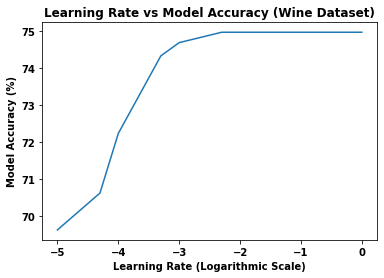

In [45]:
#Test Logisitc Regression over different learning rates

#May need to play around with num_steps and min_error (stopping requirement)

#Initialize
learning_rates = [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]
lr_accuracy = []

for learning_rate in learning_rates:
    
    average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train, y_train, K = 5, num_steps = 30000, learning_rate = learning_rate, min_error = 1e-2, random_shuffle = False)
    lr_accuracy.append(average_cross_validation_accuracy)

#Plot
plt.plot(np.log10(learning_rates), lr_accuracy)
plt.title("Learning Rate vs Model Accuracy (Wine Dataset)")
plt.xlabel("Learning Rate (Logarithmic Scale)")
plt.ylabel("Model Accuracy (%)")

Number of Iterations = 0
Minimum Cost (J) = 0.6931471805599451
Weights of Model:  [ 1.68580542e-03 -3.36001835e-04 -1.09513621e-03 -3.83979927e-05
 -4.45431430e-04 -8.35294626e-04 -9.74495550e-05 -7.70703959e-04
 -1.23918587e-03  4.45279083e-04  2.81086343e-04  1.78257776e-03]
Accuracy:  68.07151979565774 %
Error Rate:  31.928480204342275 %
Precision:  75.86206896551724 %
Recall:  74.05940594059406 % 

Number of Iterations = 0
Minimum Cost (J) = 0.6931471805599451
Weights of Model:  [ 1.68261563e-03 -4.57632326e-04 -1.14757898e-03 -9.42011470e-06
 -4.23759742e-04 -7.57958271e-04  2.95245041e-05 -7.05578689e-04
 -1.26094508e-03  3.99636608e-04  2.87628443e-04  1.80672211e-03]
Accuracy:  70.62579821200511 %
Error Rate:  29.374201787994892 %
Precision:  77.60000000000001 %
Recall:  76.6798418972332 % 

Number of Iterations = 0
Minimum Cost (J) = 0.6931471805599451
Weights of Model:  [ 1.57416268e-03 -3.96576442e-04 -1.05199192e-03  4.66058443e-05
 -4.90959928e-04 -7.75811615e-04 -7.743481

Number of Iterations = 1560
Minimum Cost (J) = 0.5035381527446163
Weights of Model:  [ 0.79086421 -0.08238474 -0.57025078  0.02098986  0.30042078 -0.08046008
  0.19673436 -0.06927993 -0.25950907  0.04516199  0.15483943  0.80826166]
Accuracy:  73.81864623243933 %
Error Rate:  26.181353767560665 %
Precision:  74.79406919275124 %
Recall:  89.72332015810277 % 

Number of Iterations = 1451
Minimum Cost (J) = 0.5214042396542634
Weights of Model:  [ 0.72881827 -0.07339803 -0.50125406  0.06057123  0.25951963 -0.09655623
  0.16974692 -0.08675305 -0.25543891  0.06990306  0.11041739  0.75846716]
Accuracy:  78.03320561941251 %
Error Rate:  21.966794380587483 %
Precision:  80.56478405315615 %
Recall:  89.81481481481481 % 

Number of Iterations = 1538
Minimum Cost (J) = 0.510907792299635
Weights of Model:  [ 0.749553   -0.05501846 -0.54165987  0.0496367   0.31808853 -0.09102574
  0.15431043 -0.12428521 -0.24548559  0.06929529  0.1429565   0.80095204]
Accuracy:  72.66922094508301 %
Error Rate:  27.33

Number of Iterations = 6041
Minimum Cost (J) = 0.5021508593977274
Weights of Model:  [ 0.8840114  -0.03202483 -0.69158802  0.02472602  0.58424668  0.03332778
  0.15911622 -0.08761201 -0.3456398   0.08474042  0.19704045  1.14946704]
Accuracy:  73.9463601532567 %
Error Rate:  26.053639846743295 %
Precision:  78.45884413309983 %
Recall:  84.68809073724007 % 

Number of Iterations = 6313
Minimum Cost (J) = 0.5000110764255776
Weights of Model:  [ 0.91093741 -0.05869249 -0.68559259  0.01222107  0.61372798  0.03211012
  0.11087285 -0.03608617 -0.37573875  0.09098254  0.18209522  1.16526296]
Accuracy:  76.50063856960408 %
Error Rate:  23.49936143039591 %
Precision:  78.8659793814433 %
Recall:  88.26923076923077 % 

average cross validation model accuracy = 75.35121328224776% 

Number of Iterations = 29999
Minimum Cost (J) = 0.5012082772421123
Weights of Model:  [ 0.93037105  0.09075805 -0.69065483 -0.0079891   0.84896987  0.02436603
  0.12426053 -0.00496911 -0.81239234  0.2143667   0.20149151 

Text(0, 0.5, 'Model Accuracy (%)')

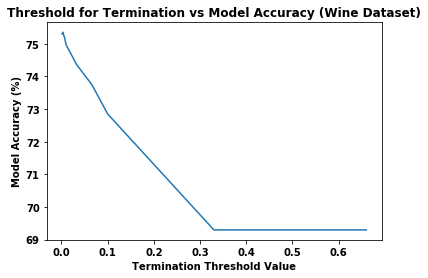

In [46]:
#Threshold of change in value of cost function as termination criteria
#Test Logisitc Regression over different thresholds of cost function improvement

#Initialize
termination_thresholds = [0.66, 0.33, 0.1, 0.066, 0.033, 0.01, 0.0066, 0.005, 0.0033, 0.001] 
termination_accuracy = []

for threshold in termination_thresholds:
    
    average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train, y_train, K = 5, num_steps = 30000, learning_rate = 0.01, min_error = threshold, random_shuffle = False)
    termination_accuracy.append(average_cross_validation_accuracy)

#Plot
plt.plot(termination_thresholds, termination_accuracy)
plt.title("Threshold for Termination vs Model Accuracy (Wine Dataset)")
plt.xlabel("Termination Threshold Value")
plt.ylabel("Model Accuracy (%)")

Number of Iterations = 99
Minimum Cost (J) = 0.6232974002894542
Weights of Model:  [ 0.14933555 -0.02287309 -0.09700601  0.00131971 -0.01805629 -0.06234716
  0.0041984  -0.05134494 -0.08843712  0.03353794  0.02579808  0.14257253]
Accuracy:  68.96551724137932 %
Error Rate:  31.03448275862069 %
Precision:  75.8893280632411 %
Recall:  76.03960396039604 % 

Number of Iterations = 99
Minimum Cost (J) = 0.6223730657983334
Weights of Model:  [ 0.1491826  -0.03263926 -0.10117033  0.00358896 -0.01588919 -0.05638394
  0.01471668 -0.04597848 -0.08971475  0.02839733  0.02606283  0.14537173]
Accuracy:  70.242656449553 %
Error Rate:  29.757343550446997 %
Precision:  76.30057803468208 %
Recall:  78.26086956521739 % 

Number of Iterations = 99
Minimum Cost (J) = 0.6266696752886253
Weights of Model:  [ 0.13993515 -0.02827604 -0.09274388  0.00903873 -0.02116065 -0.05743136
  0.00637414 -0.0512426  -0.09113431  0.02799609  0.0186999   0.14389724]
Accuracy:  72.41379310344827 %
Error Rate:  27.58620689655

Number of Iterations = 2499
Minimum Cost (J) = 0.5050274721816087
Weights of Model:  [ 0.81964069 -0.04978011 -0.6119143   0.04006456  0.43108467 -0.0378023
  0.16843737 -0.11998667 -0.27555799  0.07287067  0.17000199  0.96580641]
Accuracy:  73.05236270753512 %
Error Rate:  26.947637292464876 %
Precision:  77.41379310344828 %
Recall:  84.87712665406427 % 

Number of Iterations = 2499
Minimum Cost (J) = 0.5030800146730589
Weights of Model:  [ 0.84039488 -0.0740581  -0.59813618  0.02878789  0.44631789 -0.03654645
  0.13275248 -0.08020001 -0.28788053  0.0781798   0.16088592  0.98148987]
Accuracy:  75.35121328224777 %
Error Rate:  24.648786717752238 %
Precision:  77.8534923339012 %
Recall:  87.88461538461539 % 

average cross validation model accuracy = 74.73818646232439% 

Number of Iterations = 3493
Minimum Cost (J) = 0.5035090920498546
Weights of Model:  [ 8.88477454e-01 -1.52867219e-02 -6.44382864e-01 -3.14644349e-04
  4.82093766e-01 -2.83321359e-02  1.60975125e-01 -6.58939681e-02
 -3.

Number of Iterations = 3493
Minimum Cost (J) = 0.5035090920498546
Weights of Model:  [ 8.88477454e-01 -1.52867219e-02 -6.44382864e-01 -3.14644349e-04
  4.82093766e-01 -2.83321359e-02  1.60975125e-01 -6.58939681e-02
 -3.33587118e-01  1.26109016e-01  1.72962839e-01  9.99720090e-01]
Accuracy:  73.30779054916987 %
Error Rate:  26.69220945083014 %
Precision:  74.91582491582491 %
Recall:  88.11881188118812 % 

Number of Iterations = 3554
Minimum Cost (J) = 0.4957516372631764
Weights of Model:  [ 8.99371393e-01 -7.80997570e-02 -6.87406853e-01 -6.31601393e-04
  4.75619134e-01 -1.05265205e-03  2.14528230e-01 -4.69058665e-02
 -3.08766772e-01  3.99333317e-02  1.93673818e-01  1.07347537e+00]
Accuracy:  74.20178799489145 %
Error Rate:  25.798212005108557 %
Precision:  75.33333333333333 %
Recall:  89.32806324110672 % 

Number of Iterations = 3315
Minimum Cost (J) = 0.5141407712174669
Weights of Model:  [ 0.83536962 -0.06835817 -0.60077227  0.04860629  0.42828347 -0.02457528
  0.18619243 -0.07032095 

Text(0, 0.5, 'Model Accuracy (%)')

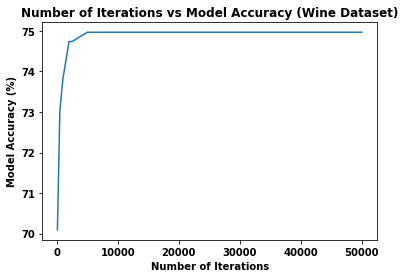

In [47]:
#Plot Accuracy of Train/Validation Set as a Function of Iterations of Gradient Descent
#Limit number of steps

#Initialize
number_of_iterations = [100, 500, 1000, 2000, 2500, 5000, 7500, 10000, 15000, 20000, 30000, 50000]
iter_accuracy = []

for num_steps in number_of_iterations:
    
    average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train, y_train, K = 5, num_steps = num_steps, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)
    iter_accuracy.append(average_cross_validation_accuracy)

#Plot
plt.plot(number_of_iterations, iter_accuracy)
plt.title("Number of Iterations vs Model Accuracy (Wine Dataset)")
plt.xlabel("Number of Iterations")
plt.ylabel("Model Accuracy (%)")

Number of Iterations = 3493
Minimum Cost (J) = 0.5035090920498546
Weights of Model:  [ 8.88477454e-01 -1.52867219e-02 -6.44382864e-01 -3.14644349e-04
  4.82093766e-01 -2.83321359e-02  1.60975125e-01 -6.58939681e-02
 -3.33587118e-01  1.26109016e-01  1.72962839e-01  9.99720090e-01]
Accuracy:  73.30779054916987 %
Error Rate:  26.69220945083014 %
Precision:  74.91582491582491 %
Recall:  88.11881188118812 % 

Number of Iterations = 3554
Minimum Cost (J) = 0.4957516372631764
Weights of Model:  [ 8.99371393e-01 -7.80997570e-02 -6.87406853e-01 -6.31601393e-04
  4.75619134e-01 -1.05265205e-03  2.14528230e-01 -4.69058665e-02
 -3.08766772e-01  3.99333317e-02  1.93673818e-01  1.07347537e+00]
Accuracy:  74.20178799489145 %
Error Rate:  25.798212005108557 %
Precision:  75.33333333333333 %
Recall:  89.32806324110672 % 

Number of Iterations = 3315
Minimum Cost (J) = 0.5141407712174669
Weights of Model:  [ 0.83536962 -0.06835817 -0.60077227  0.04860629  0.42828347 -0.02457528
  0.18619243 -0.07032095 

Number of Iterations = 3687
Minimum Cost (J) = 0.49445978296624893
Weights of Model:  [ 0.8718183  -0.07662779 -0.67579982 -0.01731592  0.54227653  0.04054644
  0.10639885 -0.12987976 -0.28619894 -0.02198297  0.16564019  1.15942713]
Accuracy:  72.37851662404093 %
Error Rate:  27.621483375959077 %
Precision:  72.6962457337884 %
Recall:  88.38174273858921 % 

Number of Iterations = 3695
Minimum Cost (J) = 0.5049692871091046
Weights of Model:  [ 0.76929434 -0.06459767 -0.69299147  0.07155395  0.56088297  0.07723276
  0.09694409 -0.09820255 -0.29001814  0.05647755  0.21228604  1.15875095]
Accuracy:  75.44757033248082 %
Error Rate:  24.55242966751918 %
Precision:  80.50541516245488 %
Recall:  84.15094339622642 % 

Number of Iterations = 3455
Minimum Cost (J) = 0.5146678286165255
Weights of Model:  [ 0.79008396 -0.09521774 -0.57741333  0.10297368  0.50218655 -0.00244617
  0.11605071 -0.12914665 -0.2933644   0.06429283  0.12581526  1.08207021]
Accuracy:  78.26086956521739 %
Error Rate:  21.73

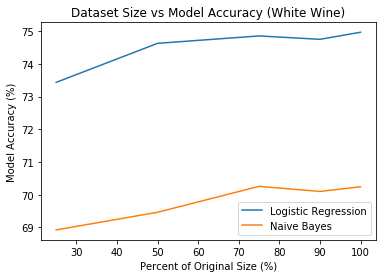

In [44]:
#Adjust size of datasets and compare accuracy
#Compare 5 different sizes

length = int(len(x_train))
length90 = int(length*0.9)
length75 = int(length*0.75)
length50 = int(length*0.5)
length25 = int(length*0.25)
length10 = int(length*0.1)

x_train_reduced = [x_train[:length90,:], x_train[:length75,:], x_train[:length50,:], x_train[:length25,:], x_train[:length10,:]] 
y_train_reduced = [y_train[:length90], y_train[:length75], y_train[:length50], y_train[:length25], y_train[:length10]]
percentage_of_original = [100, 90, 75, 50, 25]
lr_accuracy = []
nb_accuracy = []

lr_average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train, y_train, K = 5, num_steps = 5000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)
nb_average_cross_validation_accuracy = cross_validation_NB(Model_Naive_Bayes, x_train, y_train, K = 5, random_shuffle = False)
lr_accuracy.append(lr_average_cross_validation_accuracy)
nb_accuracy.append(nb_average_cross_validation_accuracy)


lr_average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train[:length90,:], y_train[:length90], K = 5, num_steps = 5000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)
nb_average_cross_validation_accuracy = cross_validation_NB(Model_Naive_Bayes, x_train[:length90,:], y_train[:length90], K = 5, random_shuffle = False)
lr_accuracy.append(lr_average_cross_validation_accuracy)
nb_accuracy.append(nb_average_cross_validation_accuracy)

lr_average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train[:length75,:], y_train[:length75], K = 5, num_steps = 5000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)
nb_average_cross_validation_accuracy = cross_validation_NB(Model_Naive_Bayes, x_train[:length75,:], y_train[:length75], K = 5, random_shuffle = False)
lr_accuracy.append(lr_average_cross_validation_accuracy)
nb_accuracy.append(nb_average_cross_validation_accuracy)

lr_average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train[:length50,:], y_train[:length50], K = 5, num_steps = 5000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)
nb_average_cross_validation_accuracy = cross_validation_NB(Model_Naive_Bayes, x_train[:length50,:], y_train[:length50], K = 5, random_shuffle = False)
lr_accuracy.append(lr_average_cross_validation_accuracy)
nb_accuracy.append(nb_average_cross_validation_accuracy)

lr_average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train[:length25,:], y_train[:length25], K = 5, num_steps = 5000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)
nb_average_cross_validation_accuracy = cross_validation_NB(Model_Naive_Bayes, x_train[:length25,:], y_train[:length25], K = 5, random_shuffle = False)
lr_accuracy.append(lr_average_cross_validation_accuracy)
nb_accuracy.append(nb_average_cross_validation_accuracy)

#lr_average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train[:length10,:], y_train[:length10], K = 5, num_steps = 5000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)
#nb_average_cross_validation_accuracy = cross_validation_NB(Model_Naive_Bayes, x_train[:length10,:], y_train[:length10], K = 5, random_shuffle = False)
#lr_accuracy.append(lr_average_cross_validation_accuracy)
#nb_accuracy.append(nb_average_cross_validation_accuracy)
        

#Plot
plt.plot(percentage_of_original, lr_accuracy)
plt.plot(percentage_of_original, nb_accuracy)
plt.title("Dataset Size vs Model Accuracy (White Wine)")
plt.xlabel("Percent of Original Size (%)")
plt.ylabel("Model Accuracy (%)")
plt.legend(["Logistic Regression", "Naive Bayes"])


Number of Iterations = 24408
Minimum Cost (J) = 0.5024140377615102
Weights of Model:  [ 9.13670414e-01 -1.07308573e-03 -6.96819344e-01  1.13747002e-02
  7.10239710e-01  3.93145761e-02  1.42815974e-01 -2.32713467e-02
 -5.57631380e-01  1.25357101e-01  1.91748426e-01  1.07767872e+00]
Accuracy:  74.08163265306122 %
Error Rate:  25.918367346938776 %
Precision:  77.64060356652949 %
Recall:  86.14916286149162 % 

Number of Iterations = 19152
Minimum Cost (J) = 0.4999102477930826
Weights of Model:  [ 9.15444432e-01 -2.39733321e-02 -6.84216168e-01 -5.43075097e-04
  6.95976052e-01  5.03140031e-02  1.53719882e-01 -4.35416836e-02
 -4.83963230e-01  1.17822051e-01  1.85495861e-01  1.15862231e+00]
Accuracy:  75.20408163265306 %
Error Rate:  24.79591836734694 %
Precision:  78.8300835654596 %
Recall:  86.14916286149162 % 

Number of Iterations = 25757
Minimum Cost (J) = 0.4986537088671429
Weights of Model:  [ 0.92437623 -0.00836698 -0.70116648  0.00869377  0.78091391  0.05197635
  0.09658493 -0.0162609

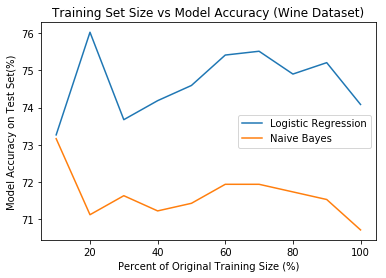

In [33]:
#The Accuracy of the Test set based on different sizes of the training set
#Need to choose optimum hyper-parameters on Logistic Regression

length = int(len(x_train))
length90 = int(length*0.90)
length80 = int(length*0.80)
length70 = int(length*0.70)
length60 = int(length*0.60)
length50 = int(length*0.50)
length40 = int(length*0.40)
length30 = int(length*0.30)
length20 = int(length*0.20)
length10 = int(length*0.10)

x_train_reduced = [x_train, x_train[:length90,:], x_train[:length80,:], x_train[:length70,:],x_train[:length60,:], x_train[:length50,:], x_train[:length40,:],x_train[:length30,:], x_train[:length20,:], x_train[:length10,:]] 
y_train_reduced = [y_train, y_train[:length90], y_train[:length80], y_train[:length70], y_train[:length60], y_train[:length50], y_train[:length40], y_train[:length30], y_train[:length20], y_train[:length10]]
percentage_of_original = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
LR_accuracy = []
NB_accuracy = []


model_LR = LogisticRegression(intercept = True)
for i in range(len(x_train_reduced)):
    w = model_LR.fit(x_train_reduced[i], y_train_reduced[i], num_steps = 30000, learning_rate = 0.01, min_error = 1e-3)            
    
    y_pred = model_LR.predict(x_test, w)
    
    accuracy = model_LR.evaluate_acc(y_test, y_pred)
    LR_accuracy.append(accuracy)


model_NB = NaiveBayes()
for i in range(len(x_train_reduced)):
    model_NB.fit(x_train_reduced[i], y_train_reduced[i])
    
    y_pred = model_NB.predict(x_test)
    
    accuracy = model_NB.evaluate_acc(y_test,y_pred)
    NB_accuracy.append(accuracy)
    

#Plot
plt.plot(percentage_of_original, LR_accuracy)
plt.plot(percentage_of_original, NB_accuracy)
plt.title("Training Set Size vs Model Accuracy (Wine Dataset)")
plt.xlabel("Percent of Original Training Size (%)")
plt.ylabel("Model Accuracy on Test Set(%)")
plt.legend(["Logistic Regression", "Naive Bayes"])
